In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt


# Loading Dataset & Preprocessing

In [2]:
DIR = r"D:\dataset"
Category = ['Mask','NoMask']

In [3]:
size = 100
data = []
for category in Category:
    folder = os.path.join(DIR,category)
    label = Category.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(size,size))
        data.append([img_arr,label])

In [4]:
random.shuffle(data)

In [5]:
X = []
Y = []
for features, labels in data:
    X.append(features)
    Y.append(labels)

In [6]:
data = []
for item in X:
    k = cv2.cvtColor(item,cv2.COLOR_BGR2GRAY)
    data.append(k)

In [7]:
X = data

In [8]:
X = np.array(X)
X.shape

(10000, 100, 100)

In [9]:
len(Y)

10000

In [10]:
x = np.array(X)
y = np.array(Y)

In [11]:
x = x/255

In [12]:
x.shape

(10000, 100, 100)

In [13]:
x_trainr=np.array(x).reshape(-1,size,size,1)
print("Training sample Dimension : ",x_trainr.shape)


Training sample Dimension :  (10000, 100, 100, 1)


In [14]:
x_trainr[0]

array([[[0.48235294],
        [0.47843137],
        [0.4       ],
        ...,
        [0.68627451],
        [0.68627451],
        [0.68627451]],

       [[0.49019608],
        [0.49019608],
        [0.45098039],
        ...,
        [0.68627451],
        [0.68627451],
        [0.67843137]],

       [[0.49019608],
        [0.49019608],
        [0.45098039],
        ...,
        [0.61568627],
        [0.61568627],
        [0.61568627]],

       ...,

       [[0.62352941],
        [0.62352941],
        [0.48627451],
        ...,
        [0.19215686],
        [0.19215686],
        [0.16862745]],

       [[0.62352941],
        [0.62352941],
        [0.52156863],
        ...,
        [0.19215686],
        [0.19215686],
        [0.17647059]],

       [[0.62352941],
        [0.62352941],
        [0.55294118],
        ...,
        [0.19215686],
        [0.19215686],
        [0.18039216]]])

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [16]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))

model.add(Dense(2,activation='softmax'))



In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_trainr,y,epochs=6,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 138s 534ms/step - loss: 0.1942 - accuracy: 0.9186 - val_loss: 0.0888 - val_accuracy: 0.9720
Epoch 2/6
250/250 [==============================] - 132s 529ms/step - loss: 0.0805 - accuracy: 0.9719 - val_loss: 0.0603 - val_accuracy: 0.9785
Epoch 3/6
250/250 [==============================] - 176s 703ms/step - loss: 0.0568 - accuracy: 0.9800 - val_loss: 0.0789 - val_accuracy: 0.9720
Epoch 4/6
250/250 [==============================] - 142s 569ms/step - loss: 0.0417 - accuracy: 0.9852 - val_loss: 0.1077 - val_accuracy: 0.9595
Epoch 5/6
250/250 [==============================] - 133s 531ms/step - loss: 0.0288 - accuracy: 0.9890 - val_loss: 0.0827 - val_accuracy: 0.9755
Epoch 6/6
250/250 [==============================] - 132s 530ms/step - loss: 0.0265 - accuracy: 0.9902 - val_loss: 0.0734 - val_accuracy: 0.9815


In [19]:
DIR = r"D:\mydataset"
Category = ['Mask','NoMask']

In [20]:
size = 100
test = []
for category in Category:
    folder = os.path.join(DIR,category)
    label = Category.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(size,size))
        test.append([img_arr,label])

In [21]:
#random.shuffle(test)

In [22]:
Xt = []
Yt = []
for features, labels in test:
    Xt.append(features)
    Yt.append(labels)

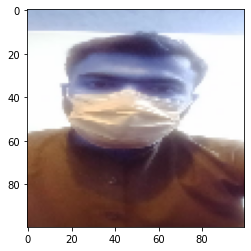

In [23]:
plt.imshow(Xt[12])

In [24]:
dataTest = []
for item in Xt:
    d = cv2.cvtColor(item,cv2.COLOR_BGR2GRAY)
    dataTest.append(d)

In [25]:
Xt = np.array(dataTest)
Xt.shape

(15, 100, 100)

In [26]:
test=np.array(Xt).reshape(-1,size,size,1)
test.shape

(15, 100, 100, 1)

In [27]:
print("Test --> ",test.shape)
print("x_trainr --->",x_trainr.shape)

Test -->  (15, 100, 100, 1)
x_trainr ---> (10000, 100, 100, 1)


In [28]:
test = test/255

In [42]:
predictions=model.predict(test)

Mask Detected


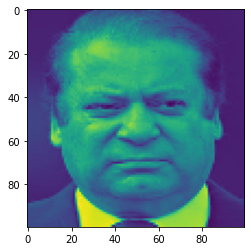

In [38]:
index = 7
out = np.argmax(predictions[index])
if out == 1:
    print("No Mask Detected")
    plt.imshow(test[index])
else:
    print("Mask Detected")
    plt.imshow(test[index])

# Accessing Camera

In [39]:
import cv2
import numpy as np
import copy
import math

x=0  # start point/total width
y=2  # start point/total width
threshold = 60  # BINARY threshold
blurValue = 7  # GaussianBlur parameter
bgSubThreshold = 50
learningRate = 0

# variables
isBgCaptured = 0   # whether the background captured

def removeBG(frame): #Subtracting the background
    fgmask = bgModel.apply(frame,learningRate=learningRate)

    kernel = np.ones((3, 3), np.uint8)
    fgmask = cv2.erode(fgmask, kernel, iterations=1)
    res = cv2.bitwise_and(frame, frame, mask=fgmask)
    return res

# Camera
camera = cv2.VideoCapture(0)
camera.set(10,200)



while camera.isOpened():
    ret, frame = camera.read()
    frame = cv2.bilateralFilter(frame, 5, 50, 100)  # smoothening filter
    frame = cv2.flip(frame, 1)  # flip the frame horizontally
    cv2.rectangle(frame, (int(x * frame.shape[1]), 0),
                 (frame.shape[1], int(y * frame.shape[0])), (255, 0, 0), 2) #drawing ROI
    cv2.imshow('original', frame)

    #  Main operation
    if isBgCaptured == 1:  # this part wont run until background captured
        img = removeBG(frame)
        img = img[0:int(y * frame.shape[0]),
                    int(x * frame.shape[1]):frame.shape[1]]  # clip the ROI
        cv2.imshow('mask', img)

        # convert the image into binary image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (blurValue, blurValue), 0)
        cv2.imshow('blur', blur)
        ret, thresh = cv2.threshold(blur, threshold, 255, cv2.THRESH_BINARY) #thresholding the frame
        cv2.imshow('ori', thresh)


        # get the coutours
        thresh1 = copy.deepcopy(thresh)
        contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #detecting contours
        length = len(contours)
        maxArea = -1
        if length > 0:
            for i in range(length):  # find the biggest contour (according to area)
                temp = contours[i]
                area = cv2.contourArea(temp)
                if area > maxArea:
                    maxArea = area
                    ci = i

            res = contours[ci]
            hull = cv2.convexHull(res) #applying convex hull technique
            drawing = np.zeros(img.shape, np.uint8)
            cv2.drawContours(drawing, [res], 0, (0, 255, 0), 2) #drawing contours 
            cv2.drawContours(drawing, [hull], 0, (0, 0, 255), 3) #drawing convex hull
    
        cv2.imshow('output', drawing)

    # Keyboard OP
    k = cv2.waitKey(10)
    if k == 27:  
        camera.release()
        cv2.destroyAllWindows()
        break
    elif k == ord('b'):  # press 'b' to capture the background
        bgModel = cv2.createBackgroundSubtractorMOG2(0, bgSubThreshold)
        isBgCaptured = 1
        print( 'Background Captured')
    elif k == ord('r'):  # press 'r' to reset the background
        bgModel = None
        isBgCaptured = 0
        print ('Reset BackGround')
    elif k == ord('e'):  # press 'b' to capture the background
        camera.release()
        cv2.destroyAllWindows()
        break

Background Captured
Background Captured


In [43]:
frame.shape

(480, 640, 3)

In [44]:
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [54]:
fram=np.array(frame).reshape(-1,480,640,1)
fram.shape

(1, 480, 640, 1)

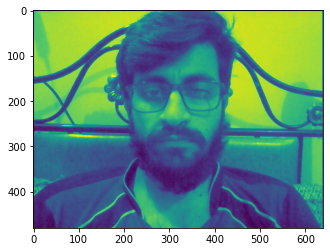

In [58]:
plt.imshow(frame)